<a href="https://colab.research.google.com/github/Jeongyoon-Jang/SOLUX_summer_data/blob/master/3-4%EC%A3%BC%EC%B0%A8/%EC%BA%90%EA%B8%80%EC%8B%A4%EC%8A%B5_12(8%EC%9B%9417%EC%9D%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv", parse_dates=["datetime"])
train.shape # train 데이터 읽어오기

(10886, 12)

In [5]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/test.csv", parse_dates=["datetime"])
test.shape # test 데이터 읽어오기

(6493, 9)

In [6]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape # year, month, hour, dayofweek을 데이터프레임에 담아준다.

(10886, 16)

In [7]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [8]:
# 연속형 feature와 범주형 feature
# 범주형 feature의 type을 category로 변경해준다.
categorical_feature_names = ["season", "holiday", "workingday", "weather",
                             "dayofweek", "month", "year", "hour"]

In [9]:
for var in categorical_feature_names:
  train[var] = train[var].astype("category")
  test[var] = test[var].astype("category")

In [10]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "hour", "dayofweek", "holiday", "workingday"]
feature_names # feature을 지정해줌

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [11]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head() # feature들을 넣어 새로운 데이터프레임인 X_train을 만들어준다

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [12]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head() # feature들을 넣어 새로운 데이터프레임인 X_test를 만들어준다,

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [13]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head() # label 데이터도 가져와서 y_train에 넣어줌

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [14]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

  if convertExp:
    predicted_values = np.exp(predicted_values),
    actual_values = np.exp(actual_values)

  predicted_values = np.array(predicted_values) # numpy로 배열 형태 바꿔줌
  actual_values = np.array(actual_values)

  log_predict = np.log(predicted_values + 1) # 예측값과 실제값에 1을 더하고 로그 씌워줌 
  log_actual = np.log(actual_values + 1)

  difference = log_predict - log_actual # 예측값-실제값 한 다음에 제곱
  difference = np.square(difference)

  mean_difference = difference.mean() # 평균

  score = np.sqrt(mean_difference) # 다시 루트를 씌운다.

  return score

In [15]:
# 선형회귀 모델

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9803697923313522


In [17]:
# Ridge

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780834


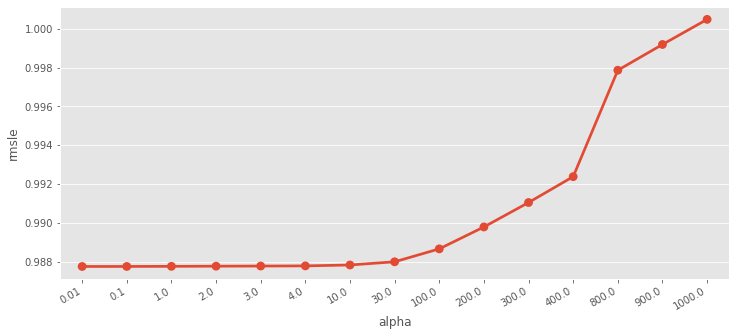

In [19]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]} # max_iter은 반복실행하는 최대 횟수
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train) # 1을 더하고 로그 씌운 값
grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds), False))

fig,ax= plt.subplots() # 학습시킨 값을 그래프로 시각화
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [20]:
# Lasso - 선형회귀의 규제를 적용하는 대안

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803727821457648


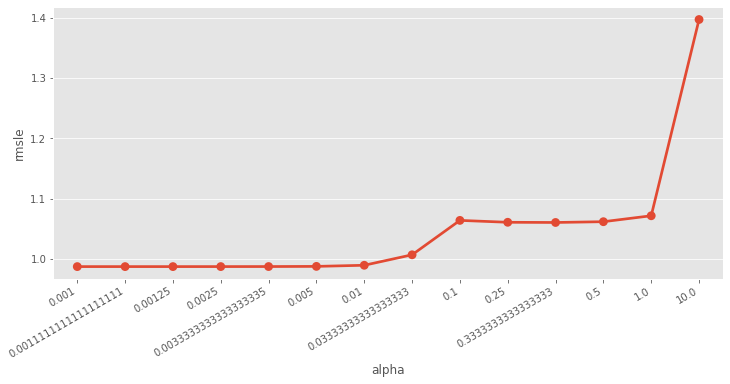

In [23]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha} # max_iter은 반복 실행하는 최대 횟수

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( X_train , y_train_log )
preds = grid_lasso_m.predict(X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds),False))

fig,ax= plt.subplots() 
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax) # 최적의 alpha 값은 0.00125

In [24]:
# 앙상블모델 - 랜덤포레스트

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.10737358103772397


In [34]:
# 앙상블모델 - 그라디언트 부스트: 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score) # GradientBoostingRegressor으로 학습시킴

RMSLE Value For Gradient Boost:  0.21357403727249366


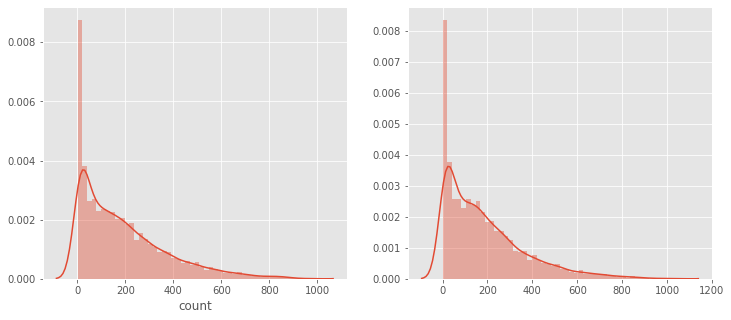

In [41]:
predsTest = gbm.predict(X_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50) # distplot형식으로 그려줌

In [42]:
# submit

In [43]:
submission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head() # 캐글에 제출

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918


In [44]:
submission.to_csv("/content/drive/My Drive/Colab Notebooks/data/Score_{0:.5f}_submission.csv".format(score), index=False)

In [40]:
207/3242 # 랜덤포레스트

0.06384947563232572

In [45]:
144/3242 # GradientBoost

0.04441702652683529